In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['dark_background', 'fivethirtyeight'])
import warnings
warnings.filterwarnings(action= 'ignore')

In [27]:
df1= pd.read_csv("C:/Users/DIBYOJIT/Downloads/churn_prediction.csv")
df1

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [28]:
df1['churn']

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [29]:
df1['occupation'].unique()

array(['self_employed', 'salaried', 'retired', 'student', nan, 'company'],
      dtype=object)

In [30]:
df1['occupation']= df1['occupation'].map({
    'self_employed':0,
    'salaried':1,
    'retired':2,
    'student':4,
    'comapny':5
})
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,0.0,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,0.0,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,1.0,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,0.0,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,0.0,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [31]:
df1['churn']

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [32]:
df1['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [33]:
df1['gender']= df1['gender'].map({
    'Male':0,
    'Female':1
})
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,0.0,0.0,0.0,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,0.0,0.0,1.0,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,0.0,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [34]:
df1= df1.dropna()
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,0.0,0.0,1.0,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [35]:
x= df1.drop(['churn', 'customer_id'], axis=1)
y= df1['churn']
x.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,last_transaction
0,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,2019-05-21
2,2194,31,0.0,0.0,1.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,NaT
4,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,2019-11-03
5,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,2019-11-01
6,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,2019-09-24


In [36]:
df1['last_year_transaction']= pd.to_datetime(df1['last_transaction']).dt.year
df1['last_month_transaction']= pd.to_datetime(df1['last_transaction']).dt.month
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,last_year_transaction,last_month_transaction
0,1,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,...,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,2019.0,5.0
2,4,2194,31,0.0,0.0,1.0,146.0,2,41,3913.16,...,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN
4,6,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,...,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,2019.0,11.0
5,7,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,...,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01,2019.0,11.0
6,8,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,...,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24,2019.0,9.0


In [37]:
df1.drop(columns= ['last_transaction'], inplace=True)
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_year_transaction,last_month_transaction
0,1,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019.0,5.0
2,4,2194,31,0.0,0.0,1.0,146.0,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN
4,6,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019.0,11.0
5,7,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019.0,11.0
6,8,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019.0,9.0


In [40]:
df1=df1.dropna()
df1

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_year_transaction,last_month_transaction
0,1,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019.0,5.0
4,6,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019.0,11.0
5,7,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019.0,11.0
6,8,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019.0,9.0
7,9,2009,46,0.0,0.0,0.0,623.0,2,317,10096.58,...,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2398,42,0.0,0.0,0.0,146.0,2,286,7493.69,...,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,2019.0,11.0
28377,30297,2325,10,1.0,0.0,4.0,1020.0,2,1207,1076.43,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019.0,10.0
28378,30298,1537,34,1.0,0.0,0.0,1046.0,2,223,3844.10,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019.0,12.0
28379,30299,2376,47,0.0,0.0,1.0,1096.0,2,588,65511.97,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019.0,12.0


In [41]:
x= df1.drop(['churn', 'customer_id'], axis=1)
y= df1['churn']
x.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,last_year_transaction,last_month_transaction
0,2101,66,0.0,0.0,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,2019.0,5.0
4,1579,42,0.0,2.0,0.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,2019.0,11.0
5,1923,42,1.0,0.0,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,2019.0,11.0
6,2048,72,0.0,0.0,2.0,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,2019.0,9.0
7,2009,46,0.0,0.0,0.0,623.0,2,317,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,2019.0,7.0


In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, train_size= 0.80, stratify= y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17634, 20), (4409, 20), (17634,), (4409,))

In [46]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf= DTC(class_weight='balanced')
clf.fit(x_train, y_train)
pred= clf.predict(x_train)

In [48]:
pred[:30]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14217
           1       1.00      1.00      1.00      3417

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634



In [50]:
pred= clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3555
           1       0.44      0.45      0.44       854

    accuracy                           0.78      4409
   macro avg       0.65      0.65      0.65      4409
weighted avg       0.78      0.78      0.78      4409



In [51]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 799.9 kB/s eta 0:00:00


In [62]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree= clf, out_file= 'tree_viz')

In [77]:
clf= DTC()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [102]:
from sklearn.metrics import f1_score
def calc_score(model, x1,y1, x2,y2):
    model.fit(x1,y1)
    predict= model.predict(x1)
    f1= f1_score(y1,predict)
    predict= model.predict(x2)
    f2= f1_score(y2, predict)
    return f1,f2

In [103]:
def effect(train_score, test_score, x_axis, title):
    plt.style.use('dark_background' )
    plt.figure(figsize=(5,5), dpi=200)
    plt.plot(x_axis, train_score, color="red", label="Train Score")
    plt.plot(x_axis, test_score, color="blue", label="Test Score")
    plt.xlabel("Parameter Value")
    plt.ylabel("F1- Score")
    plt.title("Title")
    plt.legend()
    plt.show()

In [104]:
max_depth= [i for i in range(1,50)]
train= []
test=[]
for i in max_depth:
    model= DTC(class_weight= 'balanced', max_depth=i, random_state=42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

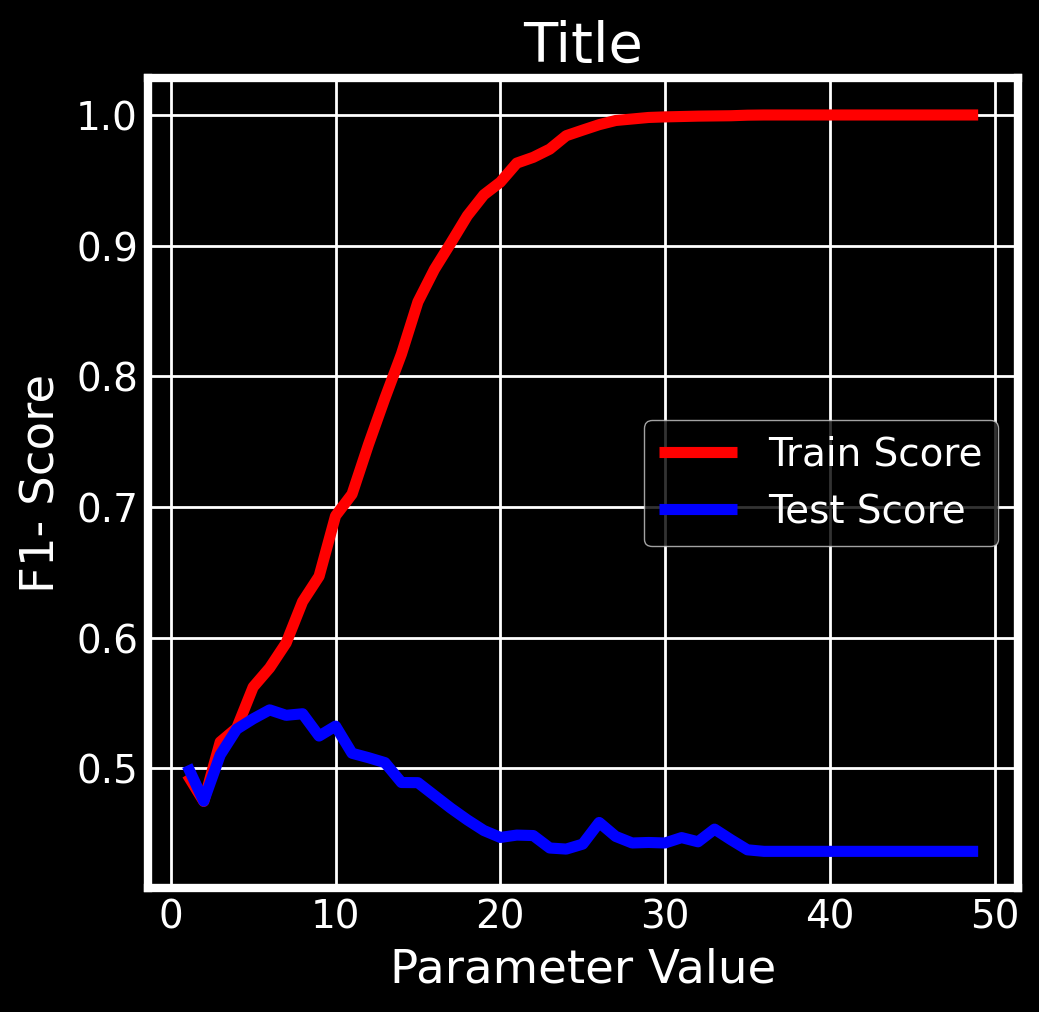

In [105]:
effect(train, test, range(1,50), 'max_depth')

In [107]:
min_samples= [i for i in range(2,5000,25)]
train= []
test=[]
for i in min_samples:
    model= DTC(class_weight= 'balanced', min_samples_split=i, random_state=42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

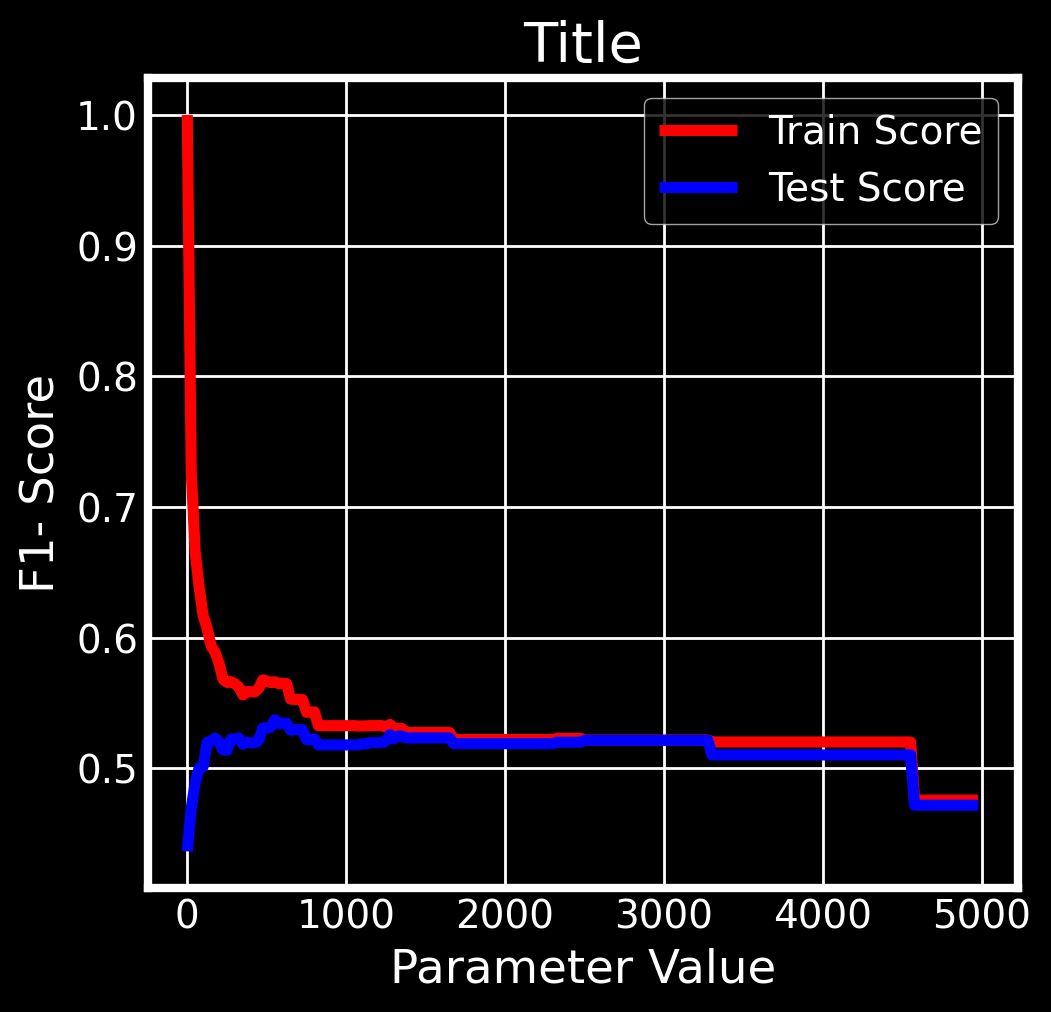

In [108]:
effect(train, test, range(2,5000,25), 'min_samples_split')

In [110]:
max_leaf_nodes= [i for i in range(2,200,10)]
train= []
test=[]
for i in max_leaf_nodes:
    model= DTC(class_weight= 'balanced', max_leaf_nodes=i, random_state=42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

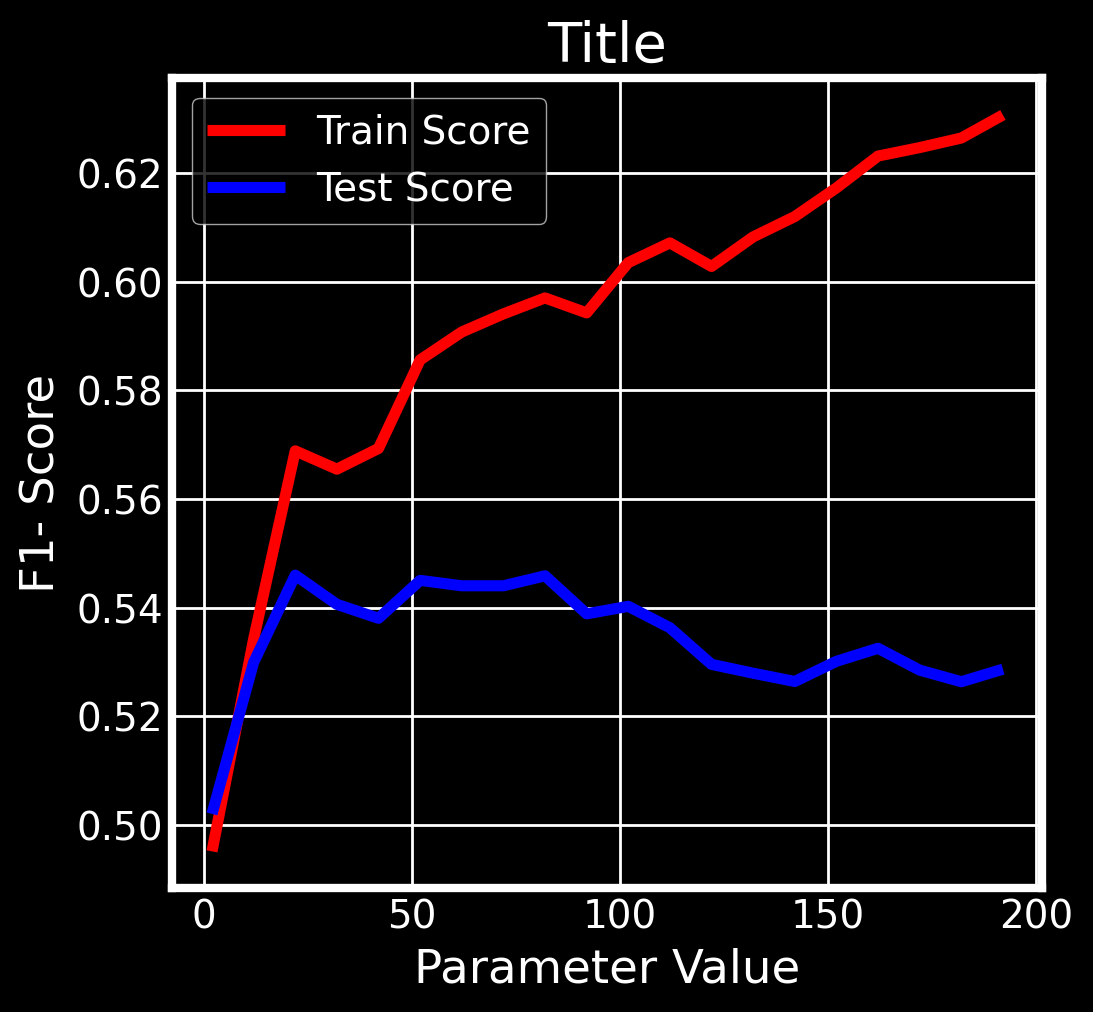

In [111]:
effect(train, test, range(2,200,10), 'max_leaf_nodes')

In [112]:
min_samples_leaf= [i for i in range(2,4500,25)]
train= []
test=[]
for i in min_samples_leaf:
    model= DTC(class_weight= 'balanced', min_samples_leaf=i, random_state=42)
    f1, f2= calc_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

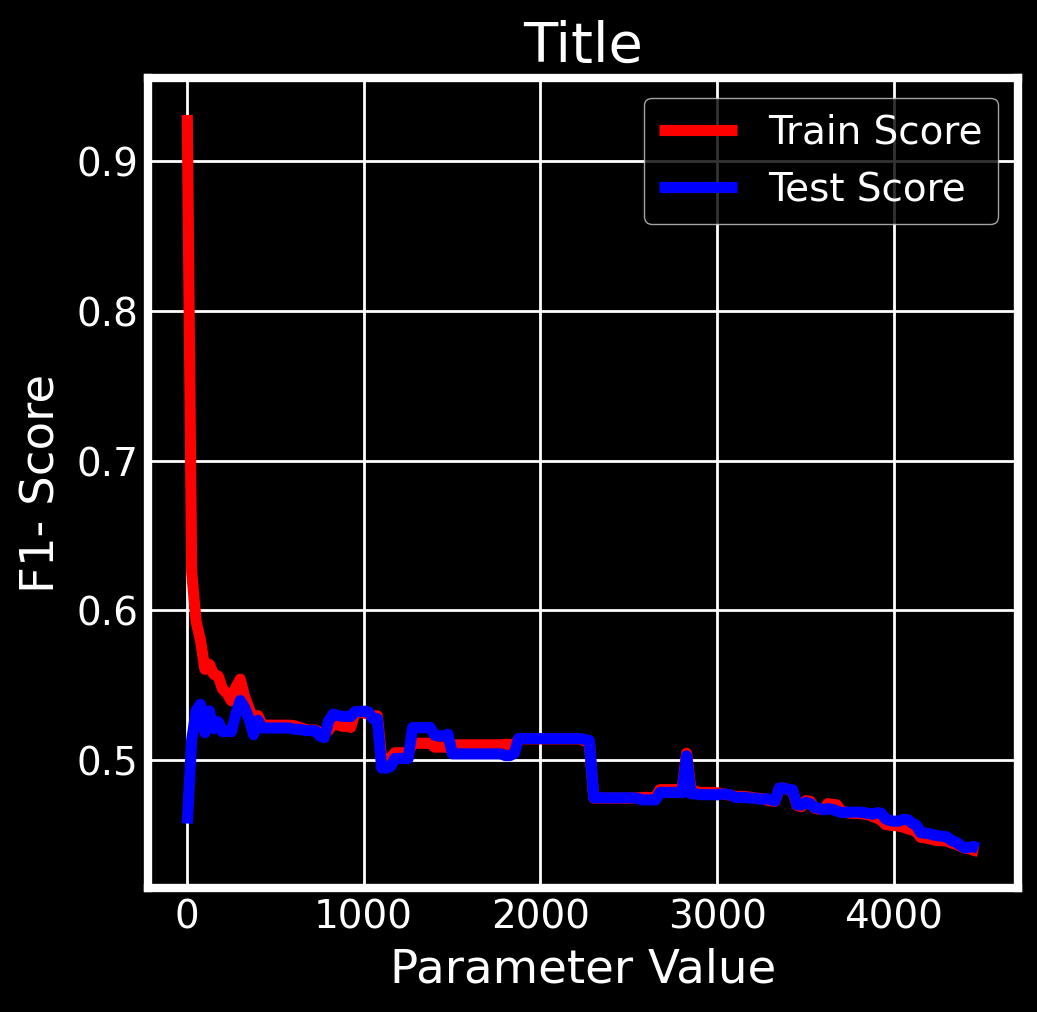

In [113]:
effect(train, test, range(2,4500,25), 'min_samples_leaf')

In [114]:
model= DTC(max_depth=9)
model.fit(x_train, y_train)
feature_imp= pd.Series(model.feature_importances_ , index= x.columns)
k= feature_imp.sort_values()

Text(0.5, 1.0, 'Feature_importance')

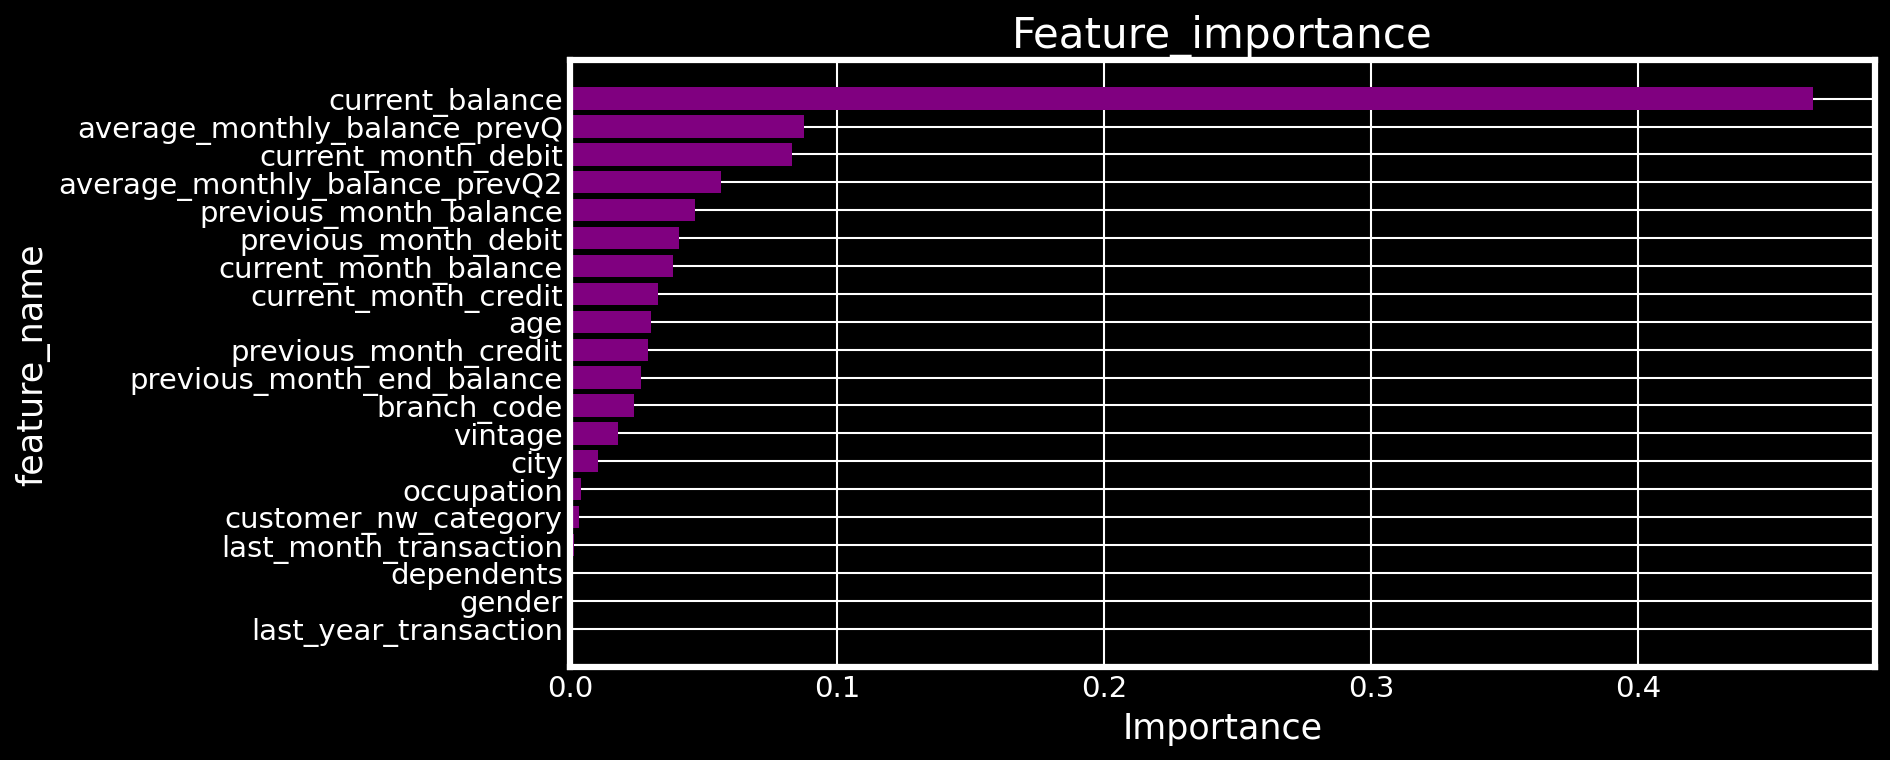

In [116]:
plt.figure(figsize=(10,5), dpi= 150)
plt.barh(k.index, k, color="purple")
plt.xlabel("Importance")
plt.ylabel("feature_name")
plt.title("Feature_importance")